In [1]:
import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import random
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rn = pd.read_csv("xor.csv")
rn

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
net = buildNetwork(2,3,1)

In [5]:
ds = SupervisedDataSet(2, 1) #dos var dep y una ind
ds.setField('input',rn[['x1','x2']])
ds.setField('target',rn[['y']])

In [6]:
trainer = BackpropTrainer(net, ds)
for i in range(10000):
    trainer.train()

In [7]:
r1 = net.activate([0,0])
r2 = net.activate([1,0])
r3 = net.activate([0,1])
r4 = net.activate([1,1])

print(r1),
print(r2),
print(r3),
print(r4)

[ 0.00789933] [ 0.98768593] [ 0.98951242] [ 0.01151035]


In [8]:
#Genero variables aleatorias entre 0 y 1 que van a ser como x1 y x2
t = 0
t1s =[]
t2s = []

while(t<1000):
    t = t + 1
    t1= random.random()
    t2 = random.random()
    t1s.append(t1)
    t2s.append(t2)

In [9]:
#Qué valor de Y predice la red neuronal?
res = []
for i in range(len(t1s)):
    r1 = net.activate([t1s[i],t2s[i]])
    res.append(r1)


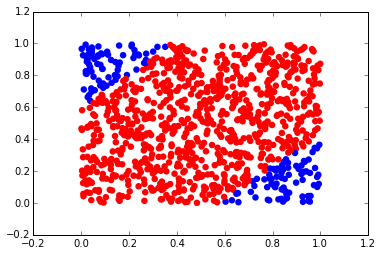

In [14]:
#Voy a plotear los valores de t1 y t2 y el color que tome dependerá del valor que predijo la red neuronal.
#Espero que sea azul para valores t1 y t2 que sean extremos, es decir más cercanos a la relación 0 y 1 o 1 y 0.
#Espero que sean rojos si son 0,0 o 1,1
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator


plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(t1s,t2s,color=['blue' if i[0]>0.5 else 'red' for i in res],linewidths=2)
plt.show()